<a href="https://colab.research.google.com/github/Kyeong-Ah/test333/blob/kka/cpi(abs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
from IPython.core.pylabtools import figsize
warnings.filterwarnings("ignore")
plt.style.use('ggplot')


In [ ]:
# # Arima
# # 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/시간별 데이터 합.csv', encoding='cp949')
cpi_abs = pd.DataFrame()
yymm = []
yymm = pd.date_range("2011-01", "2022-01", freq="M")
cpi_abs['ymd'] = yymm
cpi_abs['cpi_abs'] = data['cpi(abs)']
print(cpi_abs.head(5))
timeSeries = cpi_abs.loc[:, ['ymd', 'cpi_abs']]
# timeSeries.index = timeSeries.ymd
# timeSeries.drop('ymd', axis=1)
timeSeries = timeSeries.set_index('ymd')
print(timeSeries.head(5))
ts = timeSeries
print(ts)
print(ts.info())


         ymd  cpi_abs
0 2011-01-31    88.29
1 2011-02-28    88.89
2 2011-03-31    89.24
3 2011-04-30    89.32
4 2011-05-31    89.50
            cpi_abs
ymd                
2011-01-31    88.29
2011-02-28    88.89
2011-03-31    89.24
2011-04-30    89.32
2011-05-31    89.50
            cpi_abs
ymd                
2011-01-31    88.29
2011-02-28    88.89
2011-03-31    89.24
2011-04-30    89.32
2011-05-31    89.50
...             ...
2021-08-31   102.75
2021-09-30   103.17
2021-10-31   103.35
2021-11-30   103.87
2021-12-31   104.04

[132 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2011-01-31 to 2021-12-31
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cpi_abs  132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB
None


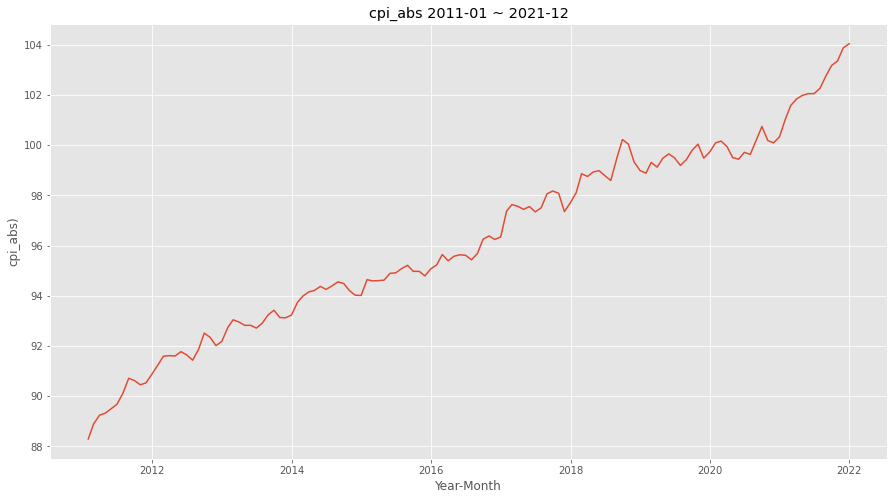

In [ ]:
# # 2011-01부터 2021-12 까지 구별-월별 아파트 평당가격 그래프
plt.figure(figsize=(15, 8))
plt.plot(ts)
plt.title("cpi_abs 2011-01 ~ 2021-12")
plt.xlabel("Year-Month")
plt.ylabel("cpi_abs)")
plt.show()


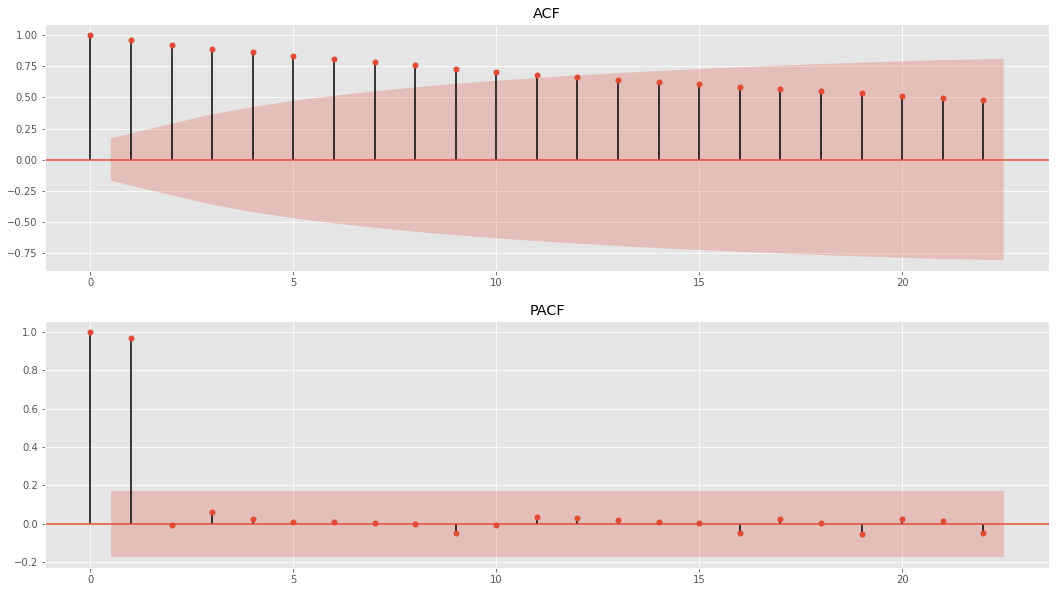

In [ ]:
# # ACF, PACF 그래프
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig = plot_acf(ts, ax = ax1)
ax1.set_title("ACF")
fig = plot_pacf(ts, ax = ax2)
ax2.set_title("PACF")
plt.show()


<Figure size 432x288 with 0 Axes>

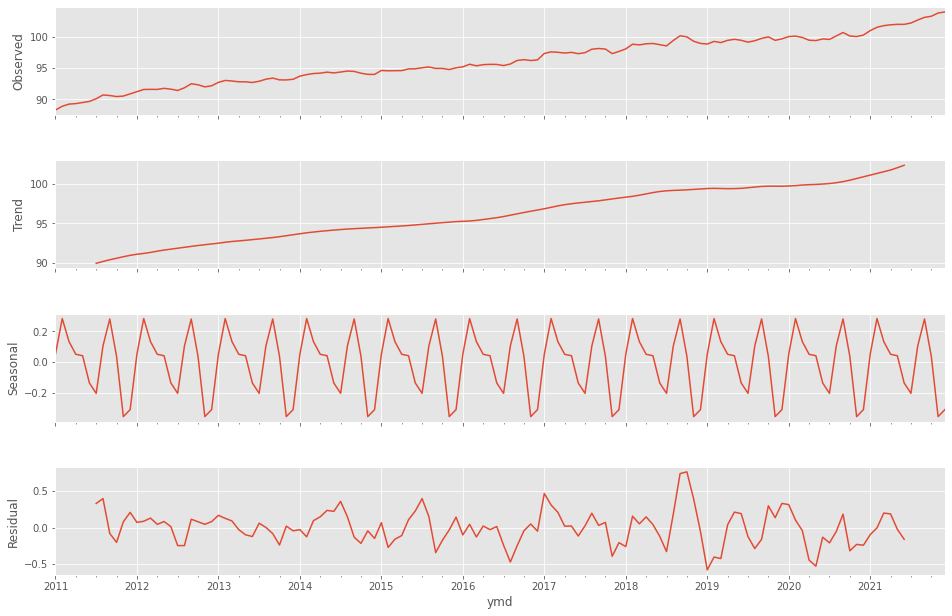

In [ ]:
# # seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['cpi_abs'], model='additive')
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)
plt.show()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


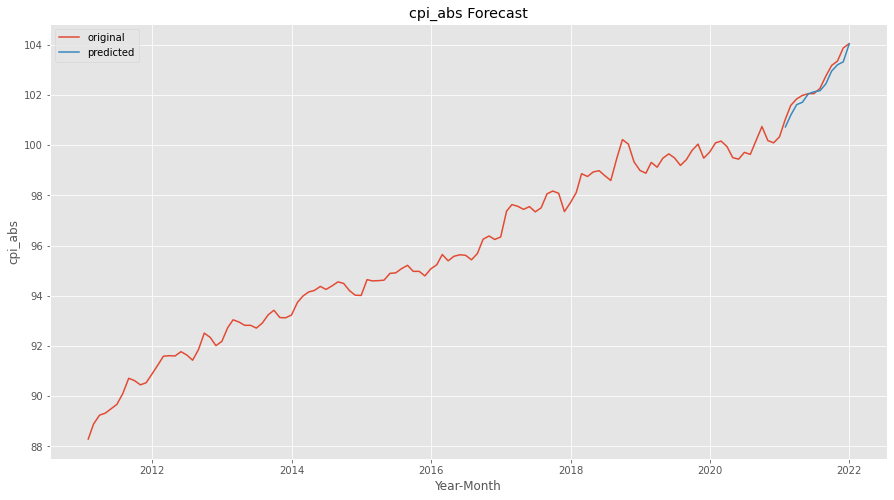

                             ARIMA Model Results                              
Dep. Variable:              D.cpi_abs   No. Observations:                  131
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 -14.565
Method:                       css-mle   S.D. of innovations              0.270
Date:                Tue, 07 Jun 2022   AIC                             41.130
Time:                        14:18:56   BIC                             58.381
Sample:                    02-28-2011   HQIC                            48.140
                         - 12-31-2021                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1177      0.019      6.203      0.000       0.080       0.155
ar.L1.D.cpi_abs    -0.3781      0.157     -2.404      0.018      -0.686      -0.070
ar.L2.D.cpi_abs    -0.1748      

In [ ]:
# # ARIMA 모델 만들기
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(ts, order=(3, 1, 1))
model_fit = model.fit()
# predict
start_index = cpi_abs['ymd'][120] # 2021-01-31 00:00:00
end_index = cpi_abs['ymd'][131]   # 2021-12-31 00:00:00
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')

# 시각화
plt.figure(figsize=(15, 8))
plt.plot(cpi_abs.ymd, cpi_abs['cpi_abs'], label="original")
plt.plot(forecast, label='predicted')
plt.title("cpi_abs Forecast")
plt.xlabel("Year-Month")
plt.ylabel("cpi_abs")
plt.legend()
plt.show()

print(model_fit.summary())



In [ ]:
# # 성능 확인
from sklearn import metrics

def score_check(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    #     mae = round(metrices.mean_absolute_error(y_true, y_pred),3)
    corr = round(np.corrcoef(y_true, y_pred)[0, 1], 3)
    mape = round(
        metrics.mean_absolute_percentage_error(y_true, y_pred) * 100, 3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared=False), 3)
    
    df = pd.DataFrame({
        'R2':r2,
        'Corr':corr,
        'RMSE':rmse,
        'MAPE':mape
    },
                    index=[0])
    return df

score_check(np.array(cpi_abs[cpi_abs.ymd>=start_index]['cpi_abs']), np.array(forecast))


,R2,Corr,RMSE,MAPE
0,90.995,0.982,0.269,0.214


In [ ]:
fore = model_fit.forecast(steps=12)
print('예측', fore)


예측 (array([104.05130087, 104.02293198, 104.19138319, 104.36221861,
       104.51521816, 104.58789579, 104.69300972, 104.8077501 ,
       104.94854305, 105.06352354, 105.17947214, 105.28809655]), array([0.26976676, 0.42504391, 0.49780227, 0.5217686 , 0.5524239 ,
       0.59478661, 0.6438716 , 0.68003685, 0.71101336, 0.74002599,
       0.77211294, 0.80282496]), array([[103.52256773, 104.58003401],
       [103.18986123, 104.85600273],
       [103.21570868, 105.1670577 ],
       [103.33957095, 105.38486627],
       [103.43248721, 105.59794912],
       [103.42213545, 105.75365613],
       [103.43104458, 105.95497486],
       [103.47490235, 106.14059784],
       [103.55498247, 106.34210363],
       [103.61309925, 106.51394784],
       [103.6661586 , 106.69278569],
       [103.71458854, 106.86160457]]))
